In [2]:
### -----------------------------------------------------------------------------------------------------------###
#                                                                                                                #
#                                     Please Read All the comments ⊂(◉‿◉)                                        #
#                                                                                                                #
###------------------------------------------------------------------------------------------------------------###

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [24]:
### -----------------------------------------------------------------------------------------------------------###
#                                            Perfect Binary Data                                                 #
###------------------------------------------------------------------------------------------------------------###

In [25]:
# draw random independent variable values
x = np.arange(0,150)
# set dependent variable values
y = np.zeros(150)
y[:75] = np.ones(75)

# draw random independent variable values
x_test = np.arange(40,110,3)
# set dependent variable values
y_test = np.zeros(24)
y_test[:12] = np.ones(12)

# to see format of the data uncomment line below
# print(x[:10],'\n',y[:10],'\n',x_test[:10],'\n',y_test[:10])

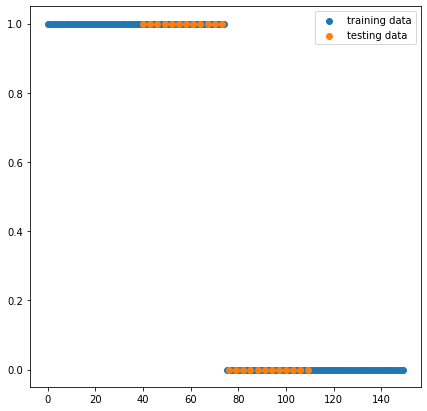

In [26]:
# draw a scatter plot of the x,y and x_test,y_test
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()

ax.scatter(np.sort(x),y,label='training data')
ax.scatter(np.sort(x_test),y_test,label='testing data')
plt.legend()

In [27]:
# transorm x to x_train for .fit (so sklearn can process it)
x_train = x[:,np.newaxis]
# to see x_train uncomment line below
# print(x_train)

In [29]:
# fit the model
reg = LogisticRegression()
reg.fit(x_train,y)

# predict labels(like y_test) for features(x_test) 
preds = reg.predict(x_test[:,np.newaxis])

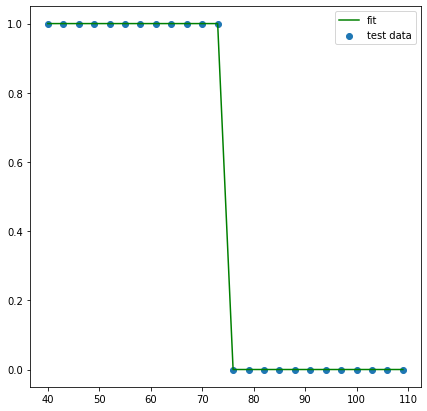

In [30]:
# draw a scatter plot of the x,y and x_test,y_test and predictions (fit line)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()

ax.plot(x_test,preds,label='fit',c='green')
# ax.scatter(x,y,label='training data')
ax.scatter(x_test,y_test,label='test data')

plt.legend()